# Using Fast Fourier Transform (FFT) to find appropriate sequance length for Artificial Neural Network (ANN) models

*Since scaling (like standardization) distorts frequency amplitude I decided to use raw data*

In [ ]:
# Important necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

import warnings
import os

#ignore warnings for the notebook
warnings.filterwarnings('ignore')

# Load data

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Set your working directory [Do not forget to make a short-cut of the folder shared by Galina to your Drive]
os.chdir('/content/drive/MyDrive/#WaterSoftHack25 - Water quality project/Project Codes/input datafiles/')

In [ ]:
# Import daily data file
df = pd.read_csv('11447650_filled_daily_data.csv')
df.head()

,DATE,SSC_mg_L,SSD_st_d,Discharge_cfs,Precip_in,Turb_fnu
0,2009-12-03,25.0,562.0,8440.0,0.00,4.225000
1,2009-12-04,20.0,478.0,8650.0,0.00,4.405208
2,2009-12-05,14.0,334.0,8520.0,0.00,4.281053
3,2009-12-06,11.0,242.0,8250.0,0.13,4.666667
4,2009-12-07,21.0,507.0,9190.0,0.42,4.757317


# Arrange data for FFT

In [ ]:
ssc_series = df['SSC_mg_L'].dropna().values  # use raw or lightly filled data
n = len(ssc_series)
timestep = 1  # daily frequency

# Compute FFT

In [ ]:
# Compute FFT
ssc_fft = fft(ssc_series)
frequencies = fftfreq(n, d=timestep)

# Take only the positive half of frequencies and corresponding FFT values
positive_freqs = frequencies[:n // 2]
magnitude = np.abs(ssc_fft)[:n // 2]


### Plot

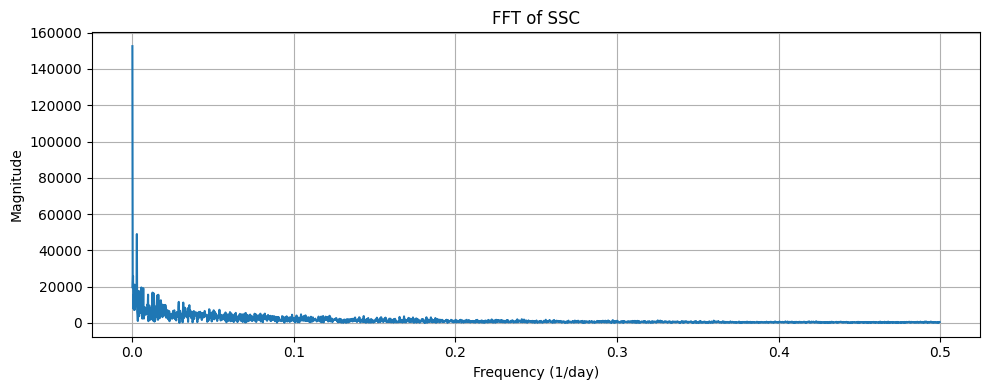

In [ ]:
# Plot FFT spectrum
plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, magnitude)
plt.title("FFT of SSC")
plt.xlabel("Frequency (1/day)")
plt.ylabel("Magnitude")
plt.grid()
plt.tight_layout()
plt.show()

# Estimate dominant period

In [ ]:
# Ignore the zero frequency (mean value)
dominant_freq_idx = np.argmax(magnitude[1:]) + 1
dominant_freq = positive_freqs[dominant_freq_idx]

# Convert frequency to period (in days)
dominant_period = 1 / dominant_freq
print(f"Dominant frequency: {dominant_freq:.4f} 1/day")
print(f"Estimated dominant period: {dominant_period:.1f} days")

Dominant frequency: 0.0028 1/day
Estimated dominant period: 360.6 days
